 <h1><center><strong> NLP - UCI ML Drug Review</strong></center></h1>
 <hr style="color:#E1CF01">

## Step1: Importing Libraries & Reading Data
<hr style="color:#E1CF01">

In [1]:
# import library, pandas to read the dataset, matplotlib to visualize data, and re to clean the text import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import string
from sklearn.cluster import KMeans
from time import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
import random
%config InlineBackend.figure_format = 'retina'
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import LatentDirichletAllocation
from autocorrect import Speller
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve,confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from autocorrect import spell

In [2]:
pip install autocorrect


Note: you may need to restart the kernel to use updated packages.


In [4]:
# read data stored in file name Car-details.csv using pd.read_csv, then store the data in df dataframe
df = pd.read_csv(r'/Users/mac/Desktop/Project (4)/drugsComTrain_raw.csv')
# read data stored in file name Car-details.csv using pd.read_csv, then store the data in df dataframe
#df = pd.read_csv('drugsComTrain_raw.csv')

In [5]:
df = df.sample(n = 11000)

In [6]:
#show first ten dataframe content
df.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
40725,200386,Varenicline,Smoking Cessation,"""Day 21 on Chantix. Smoke free since day 6, s...",6,22-May-13,13
93726,114607,Codeine / promethazine,Cough,"""This combination really helps me control my c...",9,31-Jan-10,21
157865,186961,Famciclovir,Cold Sores,"""I have had cold sores since I can remember. t...",10,15-Jun-16,13
156497,230152,Dextromethorphan / phenylephrine / pyrilamine,Cold Symptoms,"""Was almost instant relief and only used it fo...",10,12-Jul-08,2
17656,34066,Zoledronic acid,Osteoporosis,"""I had a Zoledronic Acid infusion in January a...",1,14-Apr-17,16
33010,54169,Naloxegol,Opioid-Induced Constipation,"""I have to take daily opiates due to chronic b...",7,3-Aug-17,6
157697,97035,Ambien,Insomnia,"""Ambien has been a huge help to me. I have hor...",10,27-Feb-14,72
155360,12838,Etanercept,Rheumatoid Arthritis,"""I have been on Enbrel for 6 months - - after ...",8,15-Oct-10,0
47605,42792,Xulane,Birth Control,"""I&#039;ve been on Xulane for several months n...",5,7-Apr-17,11
133553,118886,Zoloft,Depression,"""I have been on Zoloft for 4 months . I am now...",4,4-May-12,13


In [14]:
# Show last five rows
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
113133,217185,Somatropin,Turner's Syndrome,"""My daughter has Turners. She has been on this...",10,14-May-09,3
58343,18816,Solifenacin,Overactive Bladde,"""VESIcare did nothing for me.""",1,23-Feb-17,9
75272,170446,Quetiapine,Bipolar Disorde,"""I&#039;m not sure how I feel about this drug ...",6,15-Jan-16,22
98936,222349,Betamethasone,Dermatological Disorders,"""This is the best at re-growing hair and works...",10,14-Jul-08,56
79557,26454,Sprintec,Birth Control,"""I have been on the Sprintec birth control pil...",1,28-Mar-15,13


In [7]:
df.shape

(11000, 7)

In [8]:
# explore the data type at each series
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 40725 to 149734
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     11000 non-null  int64 
 1   drugName     11000 non-null  object
 2   condition    10937 non-null  object
 3   review       11000 non-null  object
 4   rating       11000 non-null  int64 
 5   date         11000 non-null  object
 6   usefulCount  11000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 687.5+ KB


In [17]:
df.describe()

,uniqueID,rating,usefulCount
count,11000.000000,11000.000000,11000.000000
mean,116478.370636,7.003455,28.503727
std,66752.032379,3.252390,36.436332
min,5.000000,1.000000,0.000000
25%,58834.250000,5.000000,6.000000
50%,117274.500000,8.000000,16.000000
75%,173643.000000,10.000000,37.000000
max,232217.000000,10.000000,693.000000


## Step2: Exploration and Pre-processing
<hr style="color:#E1CF01">

### 2.1: Data Cleaning

In [9]:
# check to null values 
df.isna().sum()

uniqueID        0
drugName        0
condition      63
review          0
rating          0
date            0
usefulCount     0
dtype: int64

In [10]:
df.dropna(subset=['condition'],inplace=True)

In [11]:
# Assess if there are any duplicates.
sum(df.duplicated())

0

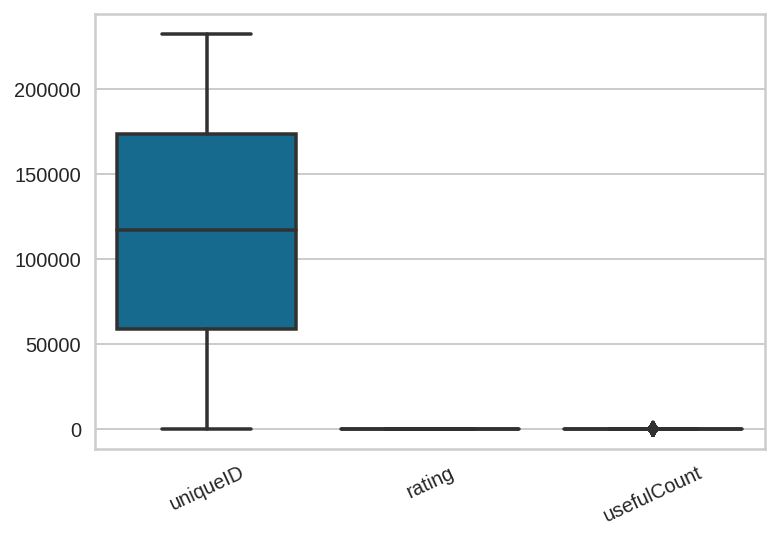

In [21]:
#Check Outlier
sns.boxplot(data=df)
plt.xticks(rotation=25);

### 2.2: Feature Engineering

In [12]:
# feature engineering 
# let's make a new column review sentiment 

df.loc[(df['rating'] >= 7), 'Sentiment'] = ('positive')
df.loc[(df['rating'] < 4), 'Sentiment'] = ('negative')

df['Sentiment'].value_counts()

positive    7268
negative    2331
Name: Sentiment, dtype: int64

In [13]:
df.head(20)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment
40725,200386,Varenicline,Smoking Cessation,"""Day 21 on Chantix. Smoke free since day 6, s...",6,22-May-13,13,NaN
93726,114607,Codeine / promethazine,Cough,"""This combination really helps me control my c...",9,31-Jan-10,21,positive
157865,186961,Famciclovir,Cold Sores,"""I have had cold sores since I can remember. t...",10,15-Jun-16,13,positive
156497,230152,Dextromethorphan / phenylephrine / pyrilamine,Cold Symptoms,"""Was almost instant relief and only used it fo...",10,12-Jul-08,2,positive
17656,34066,Zoledronic acid,Osteoporosis,"""I had a Zoledronic Acid infusion in January a...",1,14-Apr-17,16,negative
33010,54169,Naloxegol,Opioid-Induced Constipation,"""I have to take daily opiates due to chronic b...",7,3-Aug-17,6,positive
157697,97035,Ambien,Insomnia,"""Ambien has been a huge help to me. I have hor...",10,27-Feb-14,72,positive
155360,12838,Etanercept,Rheumatoid Arthritis,"""I have been on Enbrel for 6 months - - after ...",8,15-Oct-10,0,positive
47605,42792,Xulane,Birth Control,"""I&#039;ve been on Xulane for several months n...",5,7-Apr-17,11,NaN
133553,118886,Zoloft,Depression,"""I have been on Zoloft for 4 months . I am now...",4,4-May-12,13,NaN


### 2.3: EDA

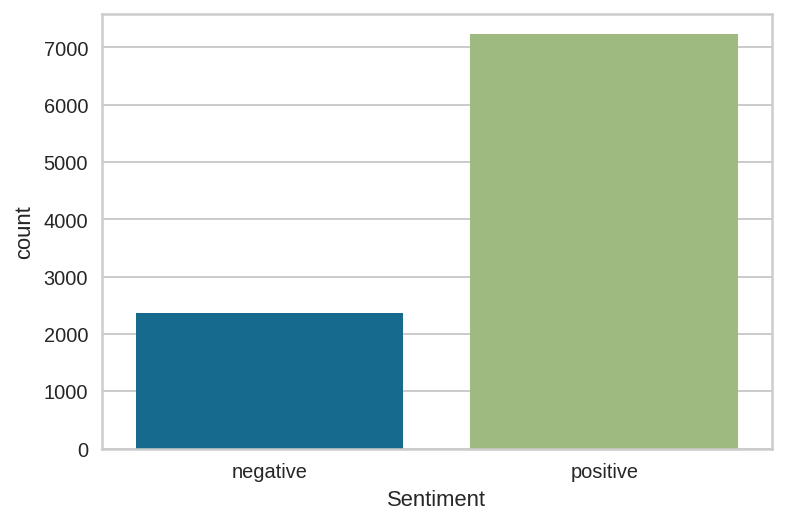

In [24]:
sns.countplot(df.Sentiment)

In [25]:
condition_df = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

In [26]:
condition_df

condition
Birth Control                114
Pain                         100
Depression                    67
High Blood Pressure           60
Acne                          56
                            ... 
Cystic Fibrosis                1
Cutaneous T-cell Lymphoma      1
Opiate Adjunct                 1
Opioid Overdose                1
von Willebrand's Disease       1
Name: drugName, Length: 471, dtype: int64

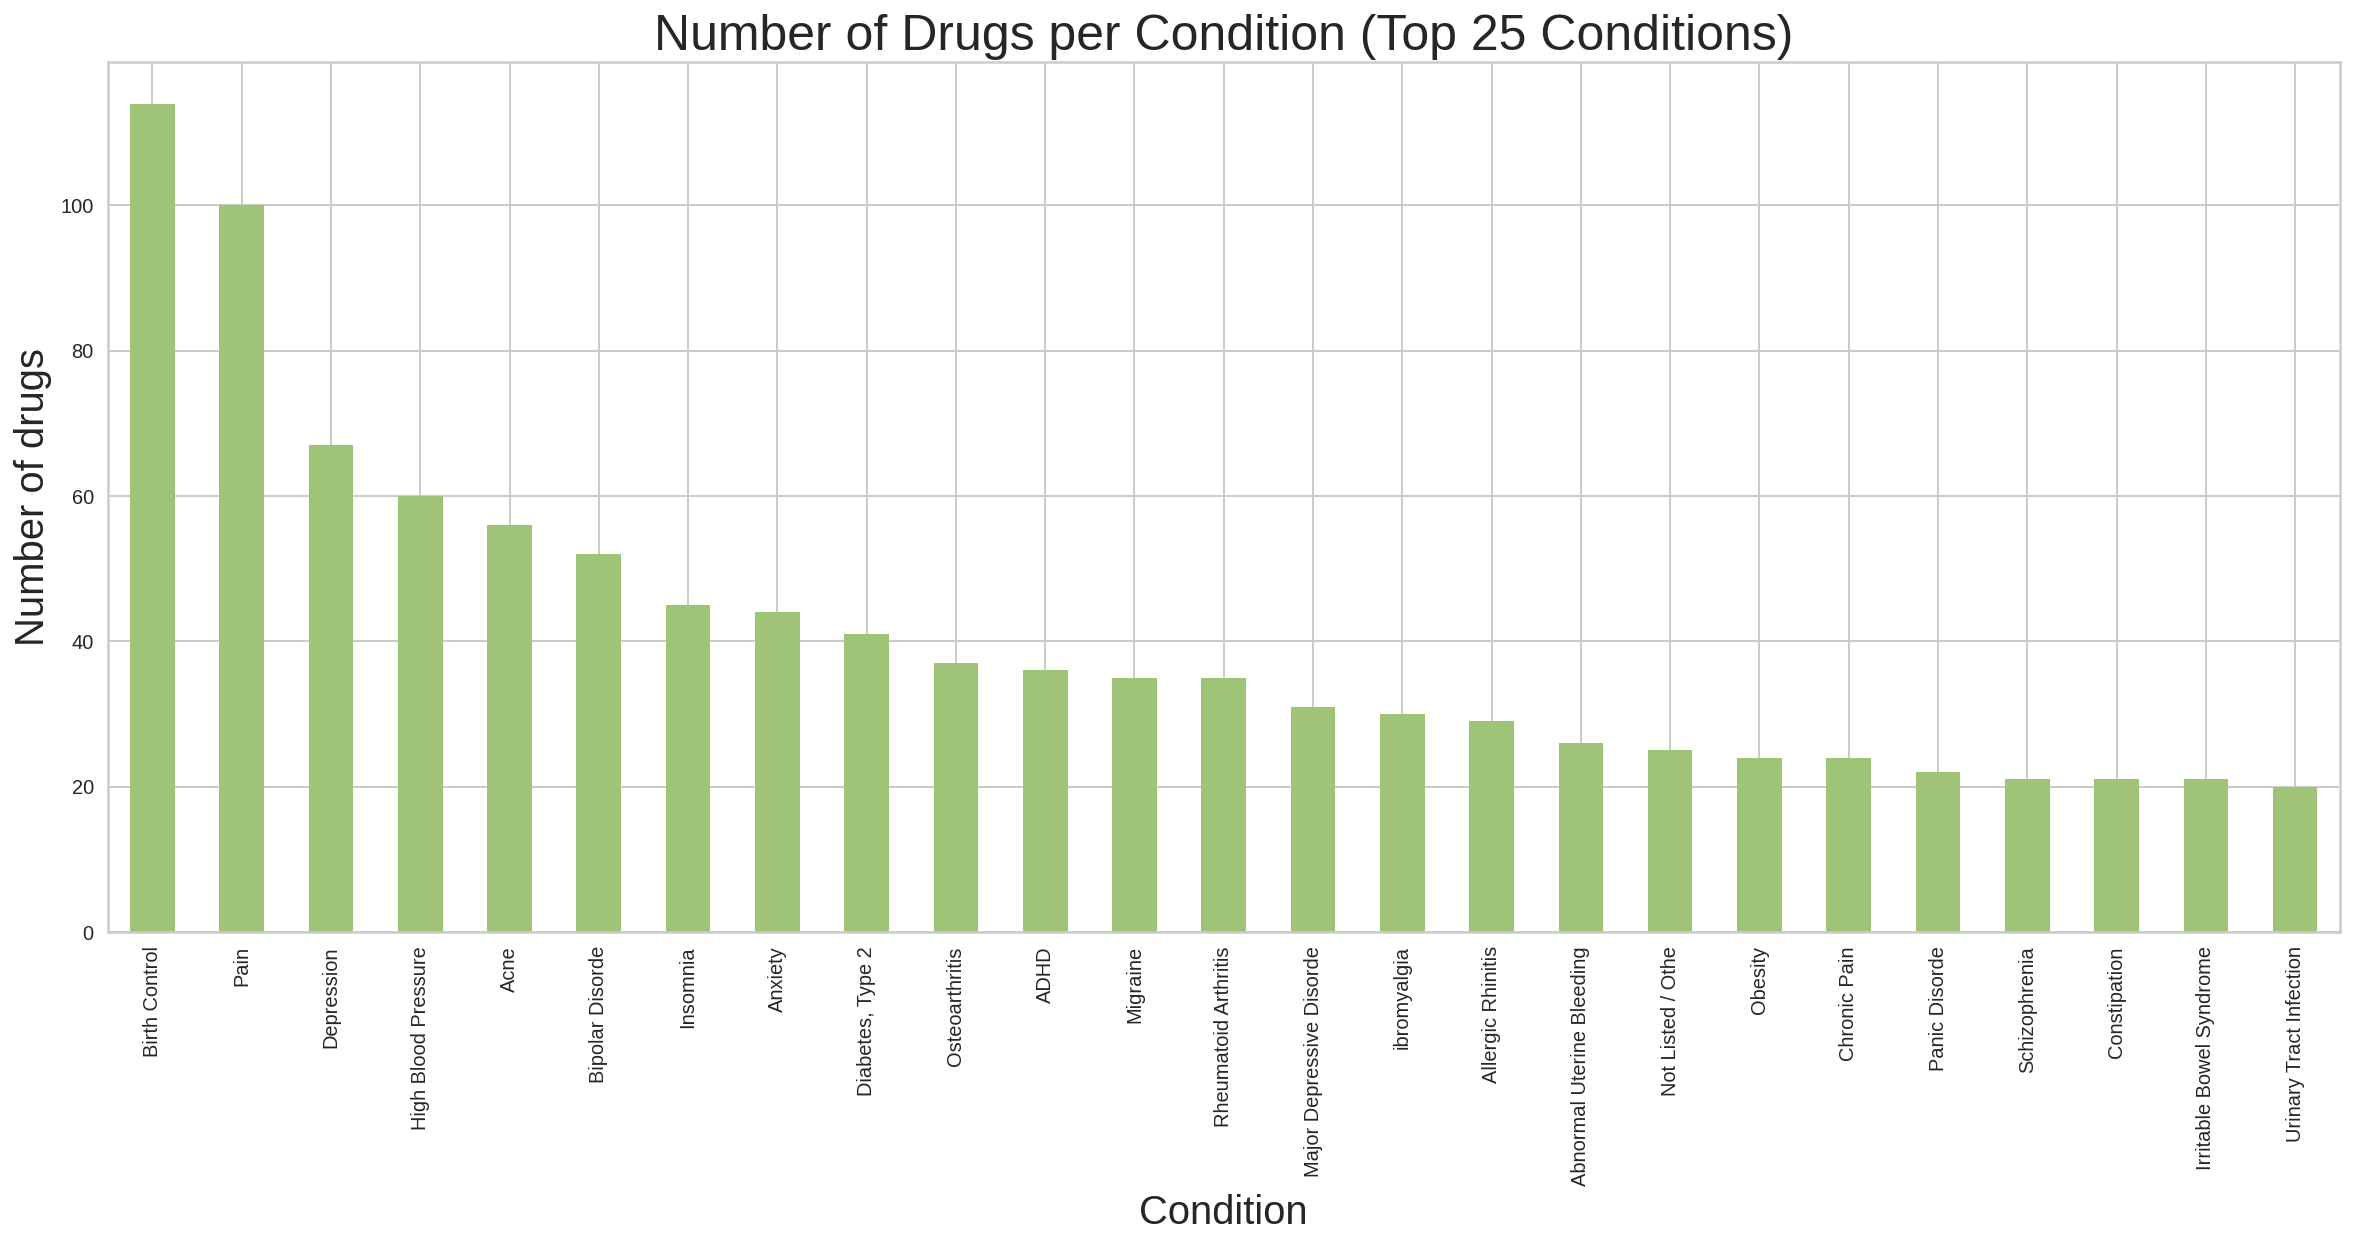

In [27]:
condition_df[0:25].plot(kind='bar', figsize=(20,8), fontsize=10, color='g')
plt.xlabel("Condition", fontsize=20)
plt.ylabel("Number of drugs", fontsize=20)
plt.title("Number of Drugs per Condition (Top 25 Conditions)", fontsize=25)
plt.show()

In [28]:
ratings = df['rating'].value_counts().sort_values(ascending=False)

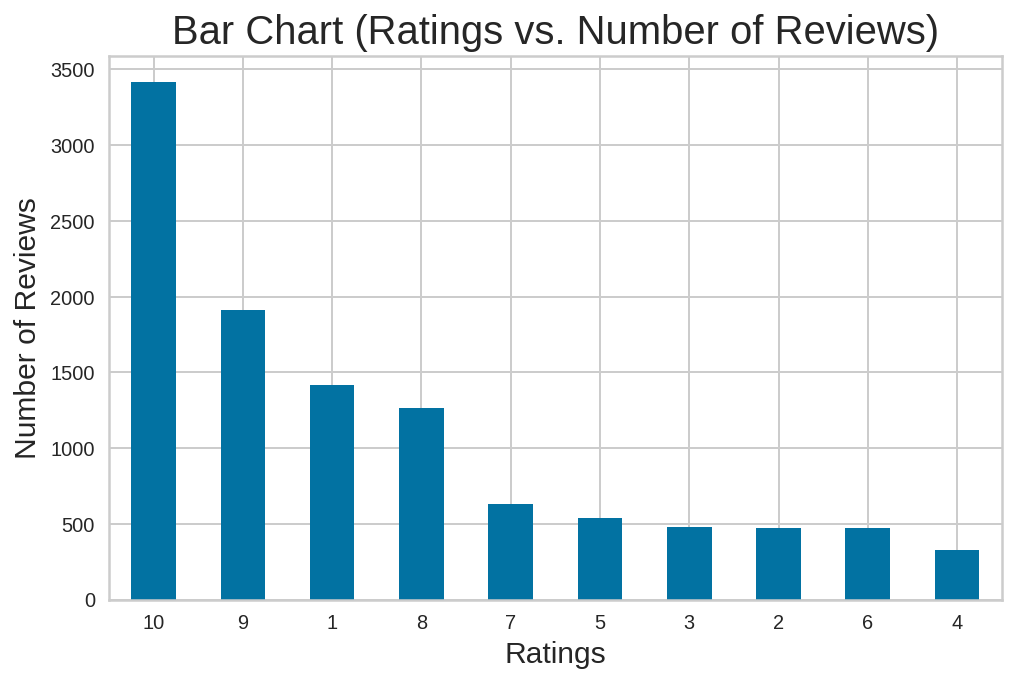

In [29]:
ratings.plot(kind='bar', figsize=(8,5), fontsize=10, color='b')
plt.xlabel("Ratings", fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel("Number of Reviews", fontsize=15)
plt.title("Bar Chart (Ratings vs. Number of Reviews)", fontsize=20)
plt.show()

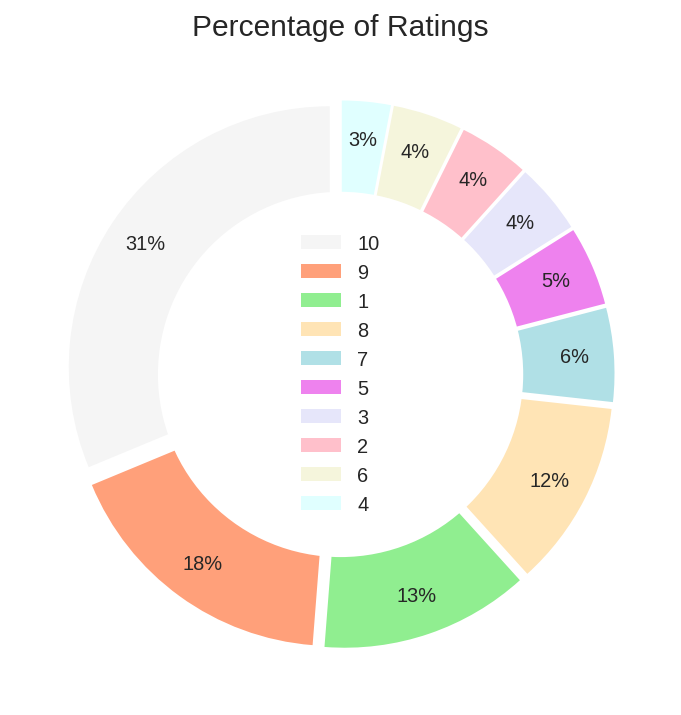

In [30]:
colors1 = ['whitesmoke','lightsalmon','lightgreen','moccasin','powderblue','violet','lavender','pink','beige','lightcyan']
explode = np.full(shape=10, fill_value=0.05, dtype='float64')
ratings.plot.pie(labels=None, colors=colors1, autopct='%1.0f%%', pctdistance=0.85, explode=explode, startangle=90, figsize=(6,6))
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.legend(ratings.index, loc='center')
plt.xlabel("")
plt.ylabel("")
plt.title("Percentage of Ratings", fontsize=15)
plt.show()

In [31]:
usefulDrugs = df.groupby(['drugName'])['usefulCount'].nunique().sort_values(ascending=False)

In [32]:
usefulDrugs

drugName
Escitalopram    66
Sertraline      59
Bupropion       55
Duloxetine      54
Gabapentin      53
                ..
Dronedarone      1
Nuedexta         1
Nystatin         1
Nystop           1
Abatacept        1
Name: usefulCount, Length: 1536, dtype: int64

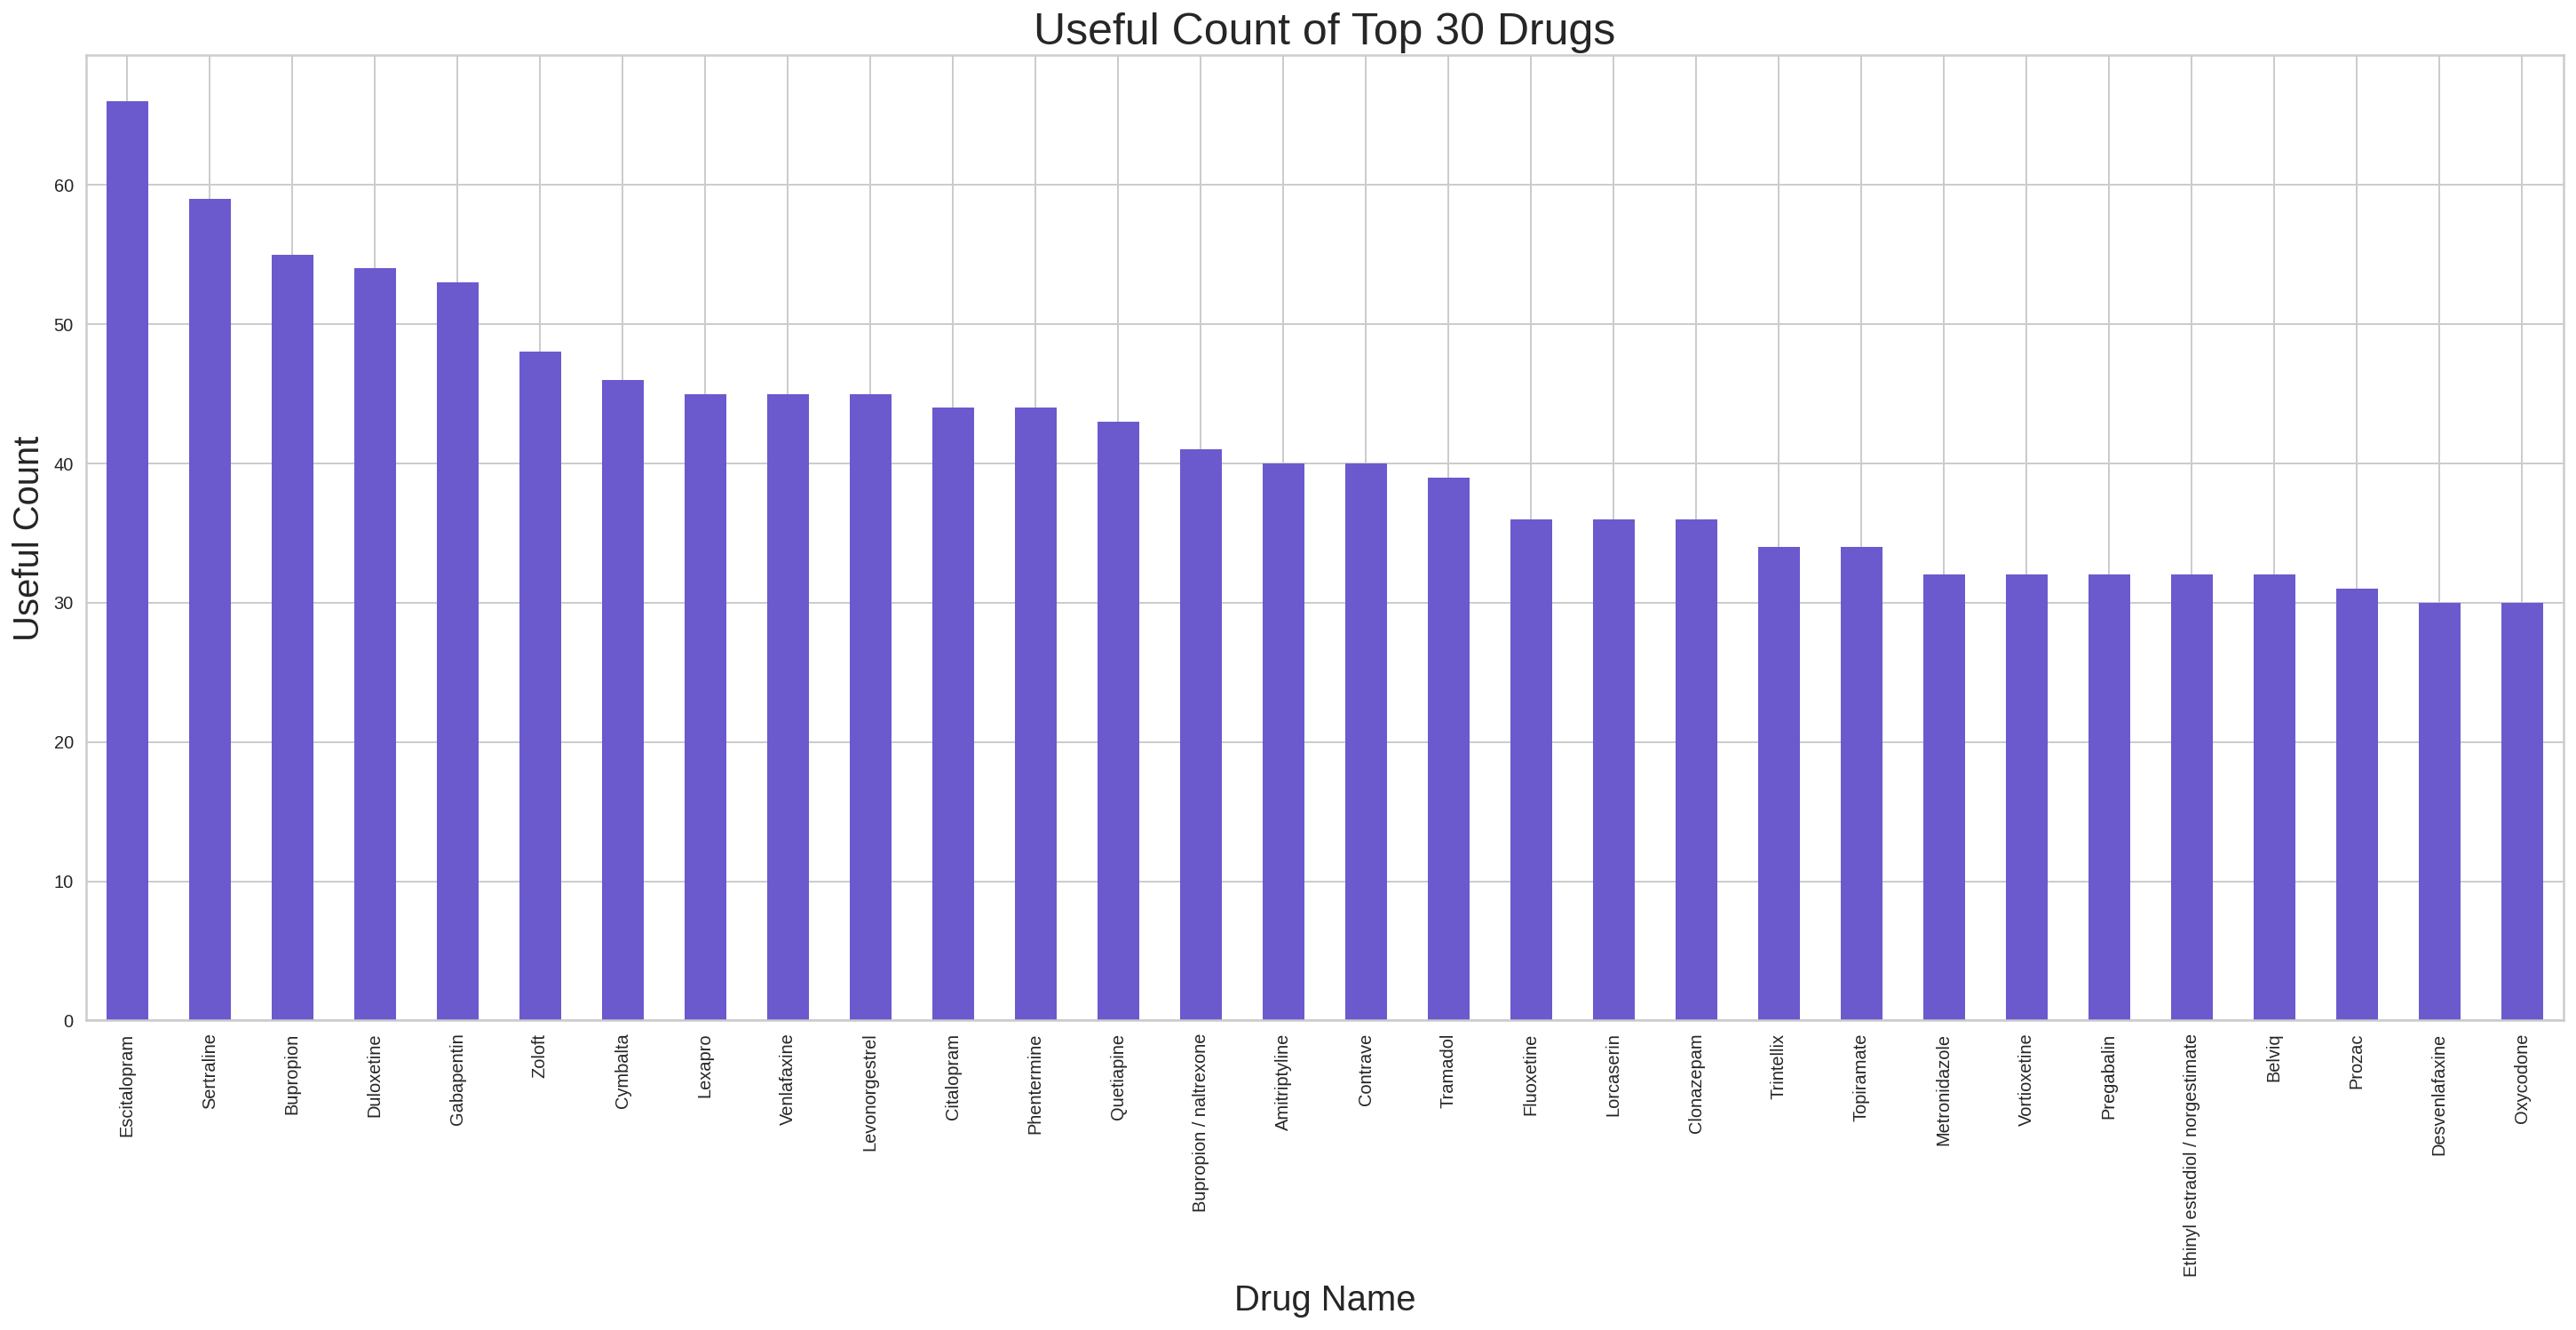

In [33]:
usefulDrugs[0:30].plot(kind='bar', figsize=(25,10), fontsize=10, color='slateblue')
plt.xlabel("Drug Name", fontsize=20)
plt.ylabel("Useful Count", fontsize=20)
plt.title("Useful Count of Top 30 Drugs", fontsize=25)
plt.show()

### 2.4: Text Cleaning


In [14]:
data = df[df['review'].map(lambda x: x.isascii())]

In [35]:
# spell checking
data['review'] = data['review'].map(lambda x: spell(x))

Streaming output truncated to the last 5000 lines.
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is depr

In [15]:
#check for alphanumeric , punctuation and repeated characteristics and remove thim
alphanumeric=lambda x: re.sub('\w*\d\w*','',x)
punc_lower=lambda x: re.sub('[%s]'%re.escape(string.punctuation),'',x.lower())

repeated_chars = lambda x: re.sub('(.)\1{2,}', '\1', x)

df['review']=df.review.map(alphanumeric).map(punc_lower).map(repeated_chars)

In [16]:
# cleaning function

nltk.download('stopwords')

ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
stopwords.words('english')

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):

    listofwords = sentence.strip().split()          # to remove any space from beginning and the end of text
    listof_words = []    
    for word in listofwords:
        if not word in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            for punctuation_mark in string.punctuation:
                word = word.replace(punctuation_mark, '')
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [38]:
all_list = set(df.index)
span_list = []
for i,j in enumerate(df['condition']):
    if '</span>' in j:
        span_list.append(i)

In [18]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&$#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [17]:
df['review_clean'] = df['review']

In [41]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,review_clean
101861,187168,Azelastine / fluticasone,Allergic Rhinitis,i have experienced awful side effects nausea d...,1,4-Oct-15,14,negative,i have experienced awful side effects nausea d...
132470,59932,NuvaRing,Birth Control,so i jsut switched from the pill to the ring i...,3,27-Jun-14,15,negative,so i jsut switched from the pill to the ring i...
80924,82686,Hyoscyamine / methenamine / methylene blue / p...,Urinary Tract Infection,i took this because i have to pee every hour o...,1,23-Sep-16,4,negative,i took this because i have to pee every hour o...
155500,210376,Linzess,"Constipation, Chronic",im years old and ive been constipated my enti...,9,30-Aug-14,137,positive,im years old and ive been constipated my enti...
28064,196550,Eszopiclone,Insomnia,started using lunesta last night first all nig...,10,2-Aug-08,10,positive,started using lunesta last night first all nig...


In [42]:
df['review_length'] = df.review.map(len)

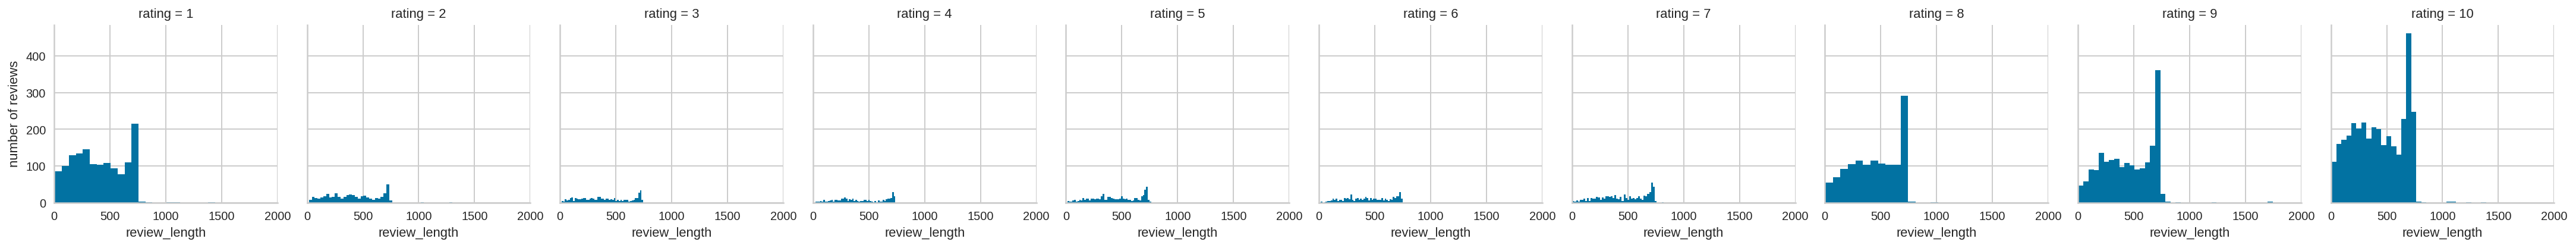

In [43]:
# check how the review lengths are distributed
ax = sns.FacetGrid(data=df, col='rating', xlim=(0, 2000)).map(plt.hist, 'review_length', bins=50)
ax.axes[0][0].set(ylabel='number of reviews');

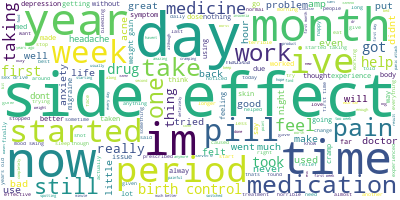

In [44]:
# Join the different processed reviews together.
long_string = ','.join(list(df['review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

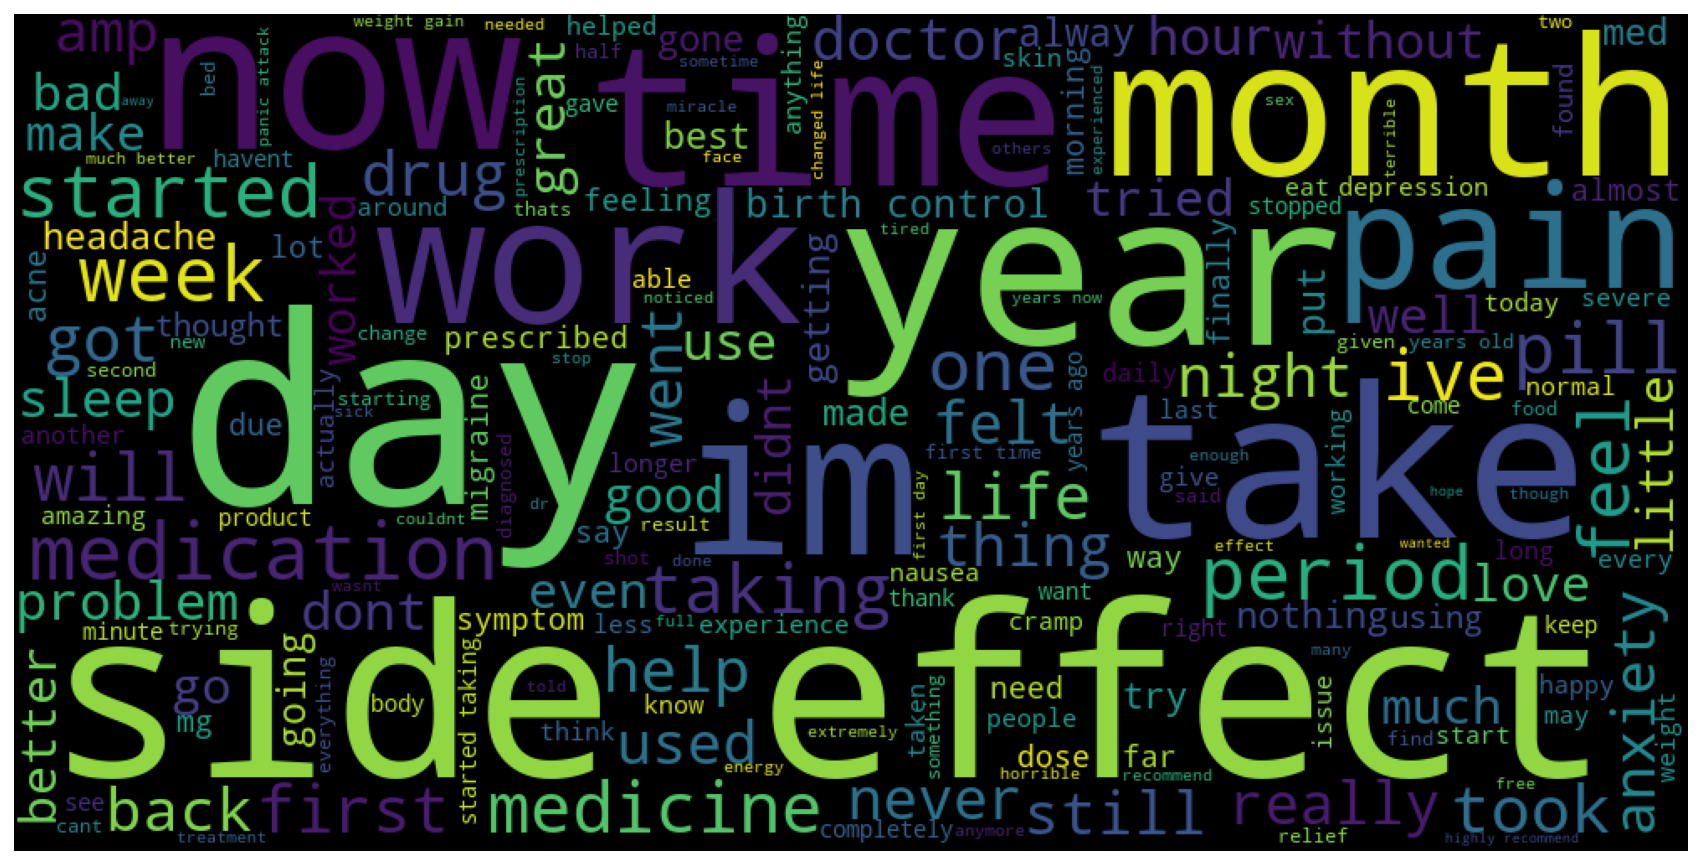

In [45]:
#!pip install wordcloud
df_rate_ten = df.loc[df.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

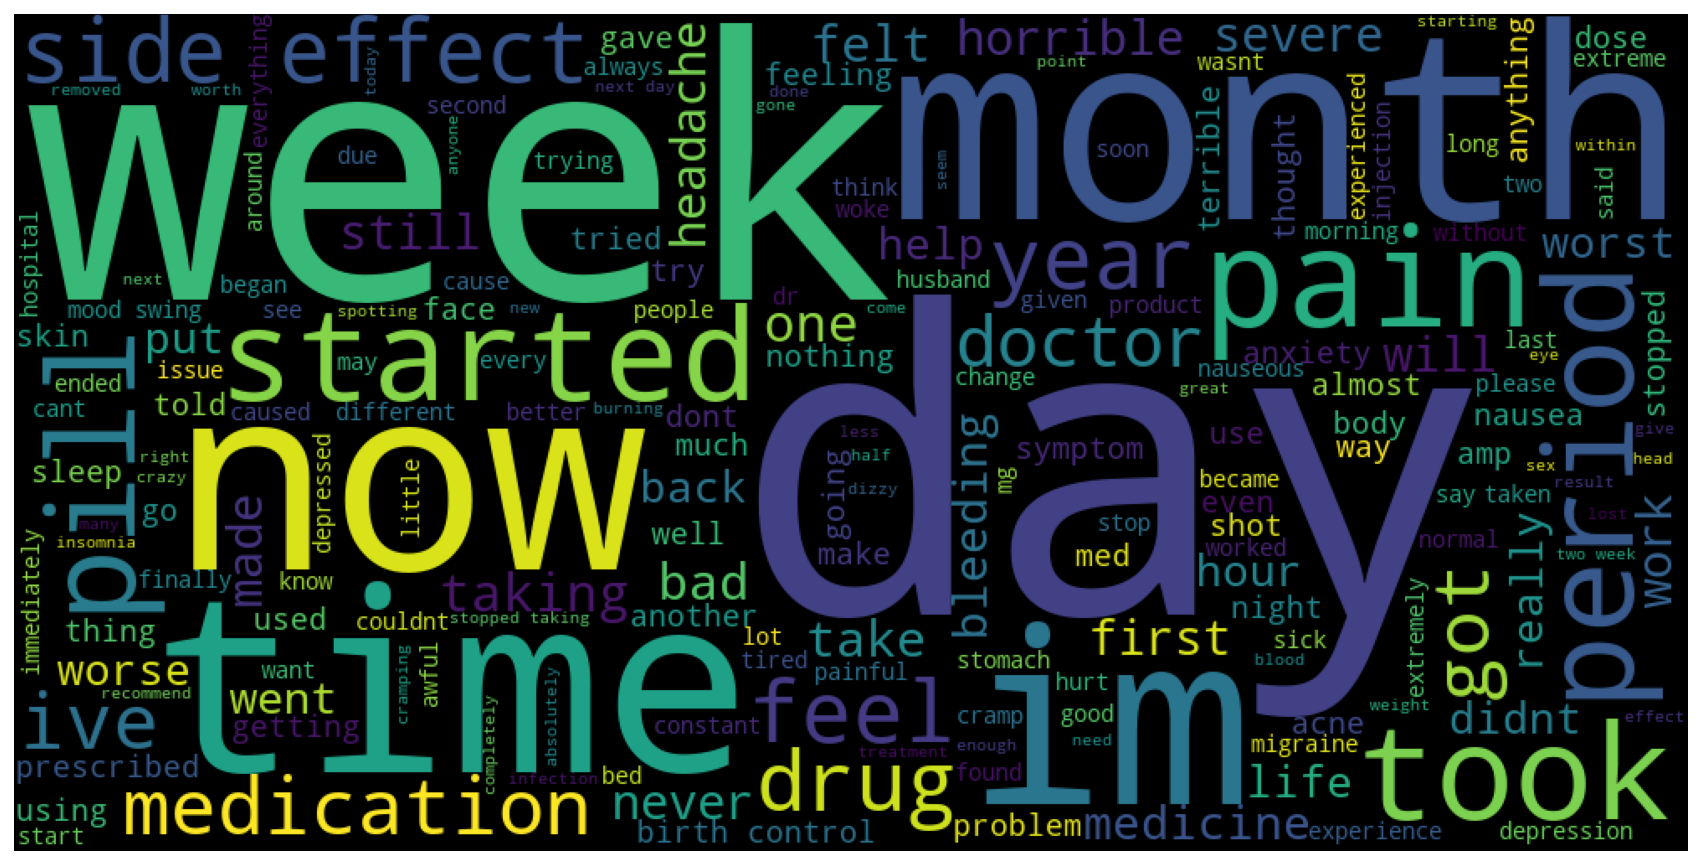

In [46]:
#!pip install wordcloud
df_rate_ten = df.loc[df.rating == 1, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

## Step3: K- Means & Hierarchical & Topic modeling
<hr style="color:#E1CF01">


### 3.1: K-Means Clustering
 

In [47]:
documents = df['review'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [48]:
k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [49]:
df['cluster'] = model.labels_
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,review_clean,review_length,cluster
101861,187168,Azelastine / fluticasone,Allergic Rhinitis,i have experienced awful side effects nausea d...,1,4-Oct-15,14,negative,i have experienced awful side effects nausea d...,165,0
132470,59932,NuvaRing,Birth Control,so i jsut switched from the pill to the ring i...,3,27-Jun-14,15,negative,so i jsut switched from the pill to the ring i...,592,1
80924,82686,Hyoscyamine / methenamine / methylene blue / p...,Urinary Tract Infection,i took this because i have to pee every hour o...,1,23-Sep-16,4,negative,i took this because i have to pee every hour o...,204,0
155500,210376,Linzess,"Constipation, Chronic",im years old and ive been constipated my enti...,9,30-Aug-14,137,positive,im years old and ive been constipated my enti...,587,0
28064,196550,Eszopiclone,Insomnia,started using lunesta last night first all nig...,10,2-Aug-08,10,positive,started using lunesta last night first all nig...,110,0


In [50]:
df['cluster'].value_counts()

0    8691
1    2244
Name: cluster, dtype: int64

In [51]:
df['Sentiment'].isnull().sum()

1337

In [52]:
df.dropna(subset=['Sentiment'],inplace=True)

In [53]:

# output the result to a text file.

clusters = df.groupby('cluster')    
distortions = []


for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['drugName','review']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()


In [54]:

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 pain
 day
 taking
 effects
 years
 medication
 im
 like
 feel
 medicine
------------
Cluster 1:
 period
 pill
 birth
 ive
 control
 im
 months
 bleeding
 periods
 acne
------------


In [55]:
model.cluster_centers_

array([[1.45720627e-04, 2.45702065e-05, 1.56410510e-05, ...,
        3.79287291e-04, 9.38992676e-05, 2.31465402e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [56]:
distortions.append(model.inertia_)


In [57]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)

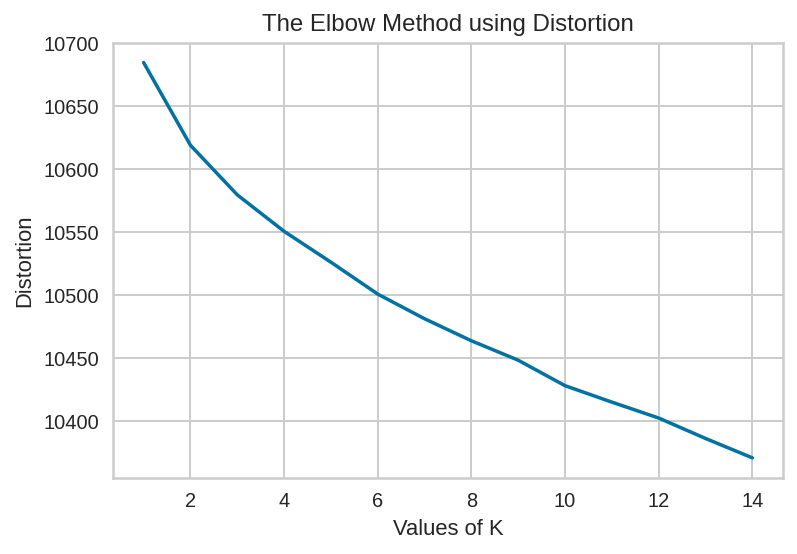

In [58]:
# Elbow-curve/SSD

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show() 

### 3.2: Hierarchical Clustering


In [59]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

In [69]:
def plot_hierarchical_clusters(linkage_matrix, drug_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    sen = drug_data['Sentiment'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=sen,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: sen[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('drug_hierachical_clusters.png', dpi=200)

In [70]:
linkage_matrix = ward_hierarchical_clustering(features)

In [71]:
np.set_printoptions(suppress=True)
print(linkage_matrix)

[[ 1269.          9112.             0.             2.        ]
 [ 3867.          6160.             0.             2.        ]
 [  383.           558.             0.             2.        ]
 ...
 [21853.         21863.            61.1652437   5255.        ]
 [21865.         21866.            80.98499949  9187.        ]
 [21862.         21867.           110.96234857 10935.        ]]


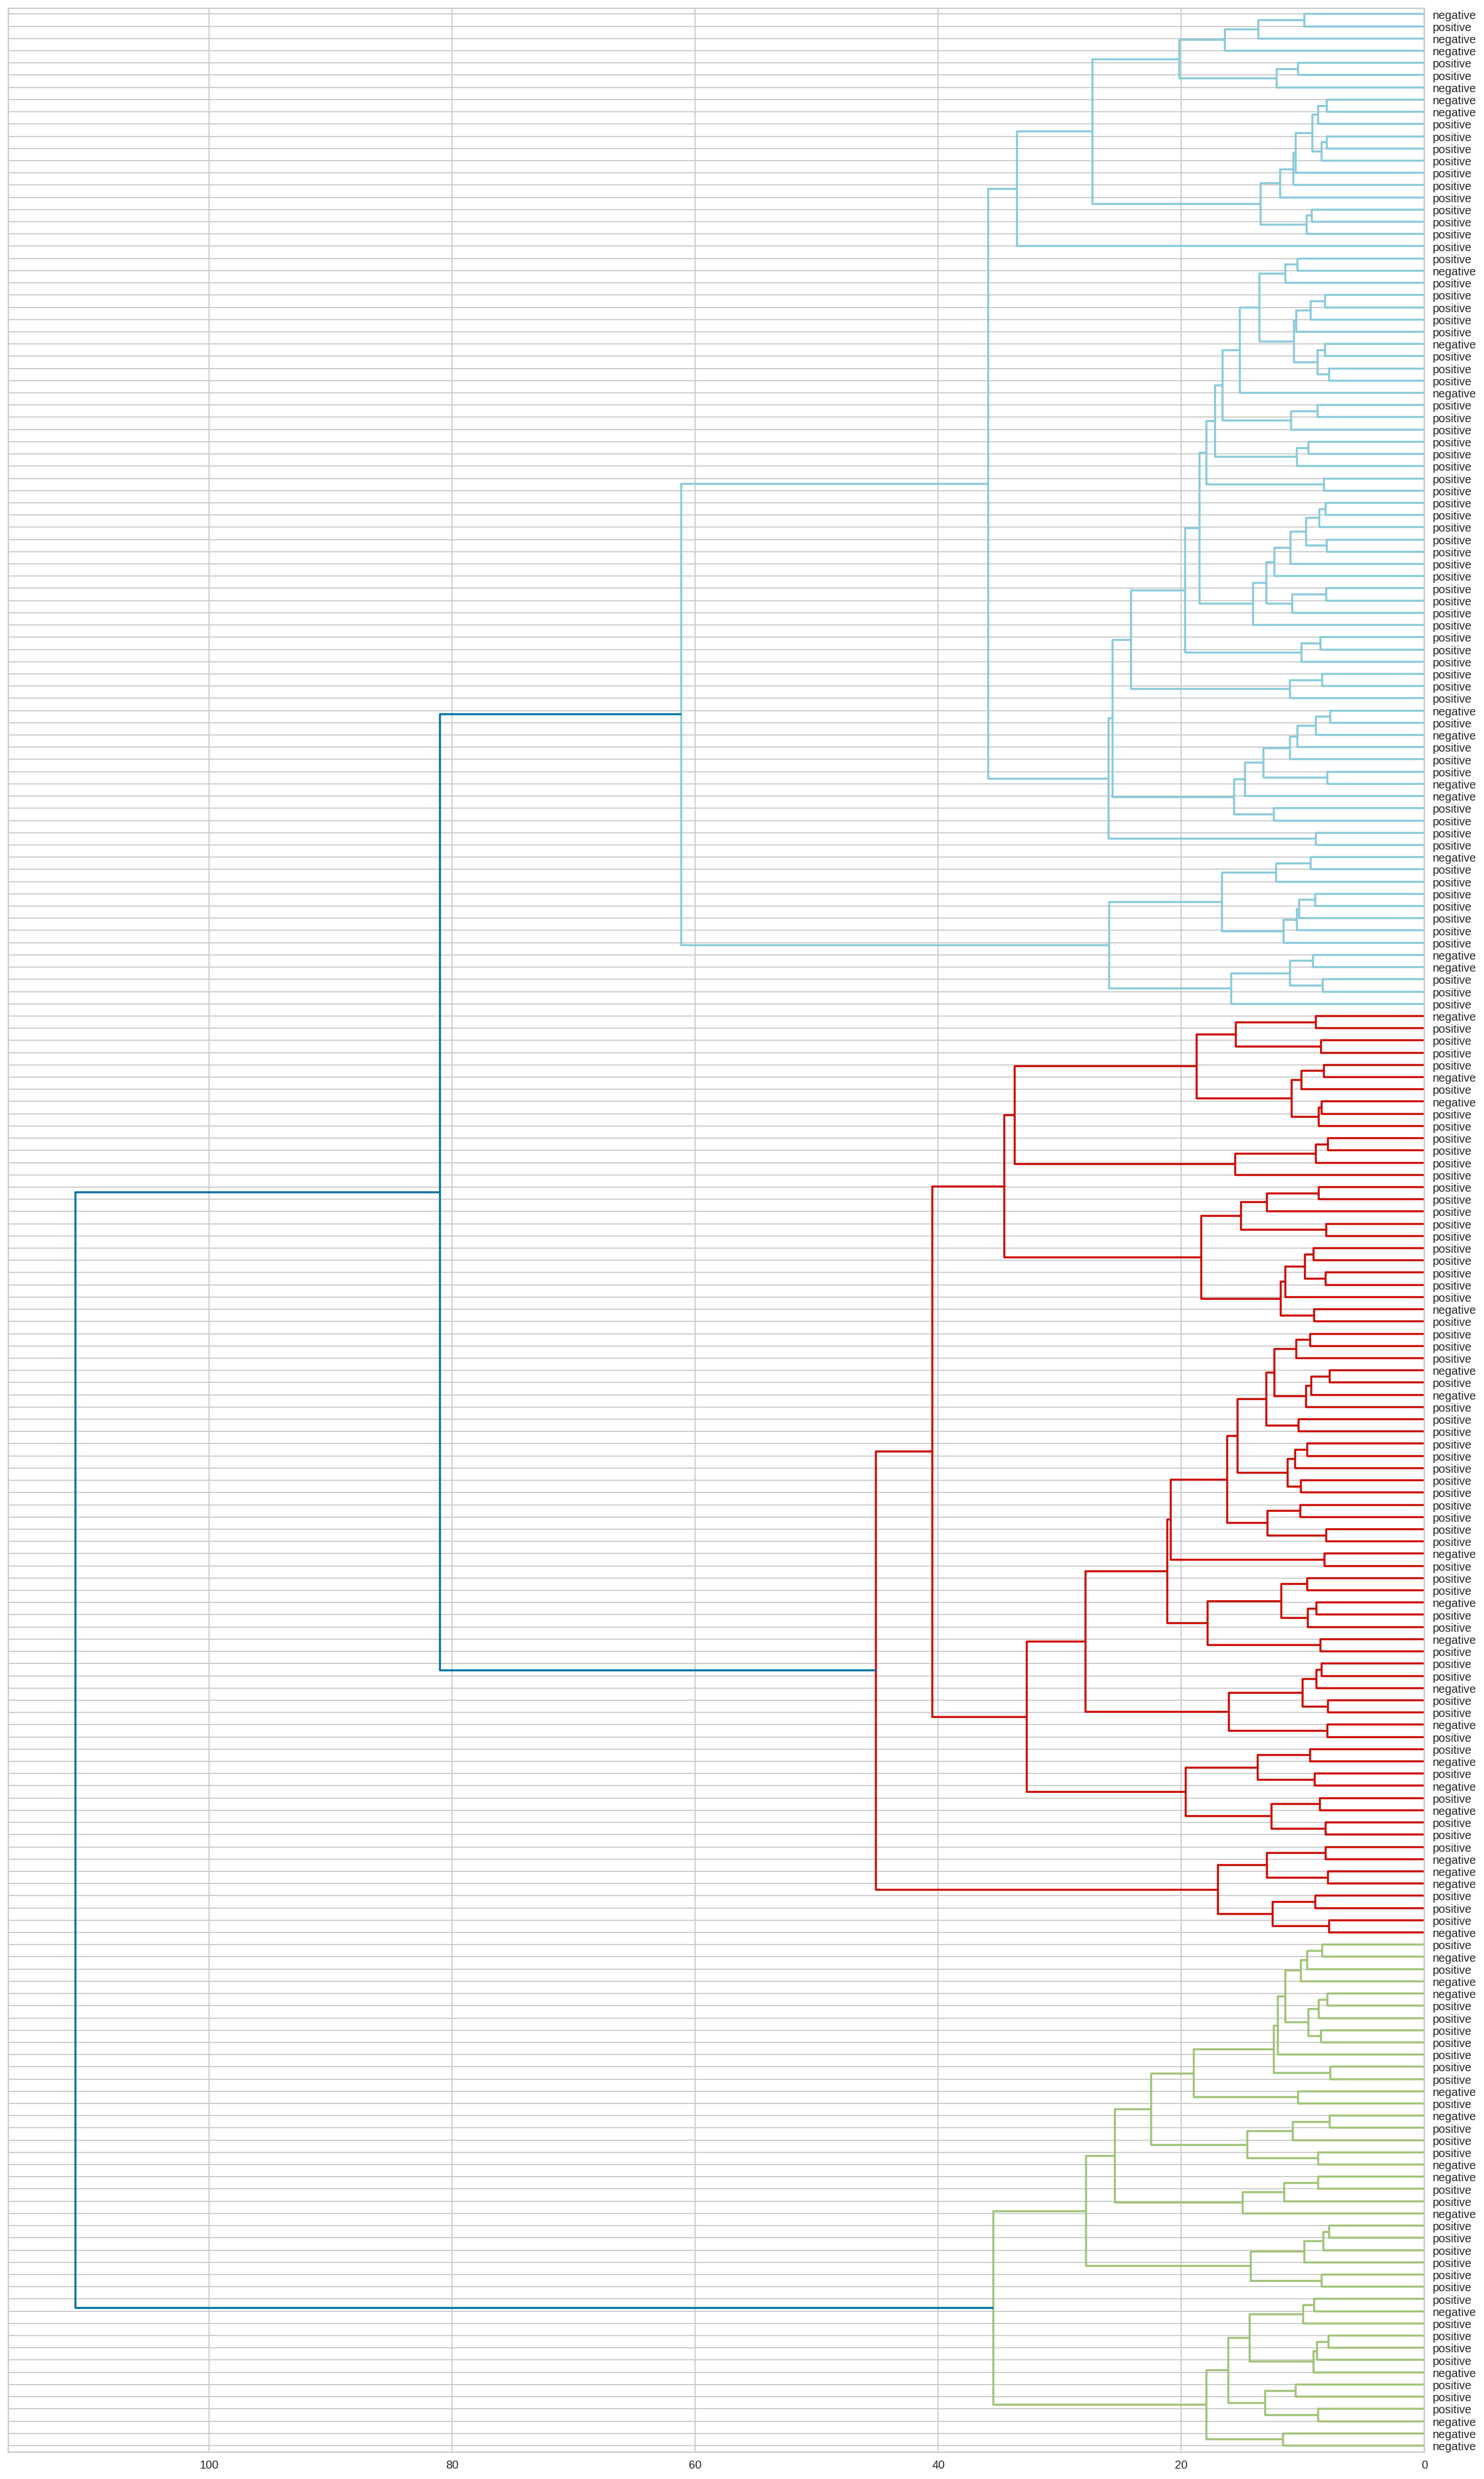

In [72]:
plot_hierarchical_clusters(linkage_matrix,
                           p=200,
                           drug_data=df,
                           figure_size=(18, 30))


In [73]:
# read data stored in file name Car-details.csv using pd.read_csv, then store the data in df dataframe
dd = pd.read_csv('cluster0.csv')

In [74]:
dd.head(4)

,id,drugName,review
0,101861,Azelastine / fluticasone,i have experienced awful side effects nausea d...
1,80924,Hyoscyamine / methenamine / methylene blue / p...,i took this because i have to pee every hour o...
2,155500,Linzess,im years old and ive been constipated my enti...
3,28064,Eszopiclone,started using lunesta last night first all nig...


### 3.3: Topic modeling (LDA)

In [37]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=2)

In [38]:
# Take only the review_body column for unsupervised learning task

data = df.loc[:, 'review_clean'].tolist()
print(type(data))
print(len(data))

<class 'list'>
10937


In [39]:
# Take a look at some of the reviews
for _ in range(5):
    print(data[_],"\n")

day  on chantix  smoke free since day  so im on day  without a smoke  still have to patchup to deal with the cravings they just have not stopped no stress just my head is missing something  smoked for  years and really want to stop  dont feel any different  just wish the craving would stop  i figured the chantix alone would be enough to knock out the cravings  i go as long as i can without a patch but have to slap one on when the feeling is too tense  going well other than that saved a lot on money which is good cause chantix and patches cost just as much 

this combination really helps me control my cough at night so that i am able to get a good nights rest 









basically if the cold sore is too powerfulyoure too late to take the medicine it still reduces the healing time from  weeks to  days amazing drug 

was almost instant relief and only used it for a day to stop a long nagging cough i get it every winter 

i had a zoledronic acid infusion in january and did well with no side

In [40]:
def tokenization_and_stemming(text):
    '''
    INPUT
    text - string
    OUTPUT
    clean_tokens - a list of words
    This function processes the input using the following steps :
    1. Remove punctuation characters
    2. Tokenize text into list
    3. Stem, Normalize and Strip each word
    4. Remove stop words
    '''
    # Remove punctuation characters and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Create a instance of stem class
    stemmer = SnowballStemmer("english")
    
    clean_tokens = []
    for word in tokens:
        clean_tok = stemmer.stem(word).lower().strip()
        if clean_tok not in stopwords:
            clean_tokens.append(clean_tok)

    return clean_tokens

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
tokenization_and_stemming(data[42])

['ive',
 'recent',
 'diagnos',
 'advanc',
 'copd',
 'dyspnea',
 'ive',
 'tri',
 'differ',
 'inhal',
 'first',
 'left',
 'confus',
 'scare',
 'wouldnt',
 'feel',
 'ani',
 'better',
 'tri',
 'anoro',
 'ellipta',
 'pleas',
 'improv',
 'feel',
 'much',
 'better',
 'im',
 'glad',
 'know',
 'dont',
 'live',
 'frighten',
 'wheez',
 'short',
 'breath',
 'anymor',
 'onli',
 'take',
 'puff',
 'day',
 'havent',
 'long',
 'thank',
 'god',
 'everyday',
 'found']

In [49]:
# Term frequency for LDA model

tf_lda = CountVectorizer(
    max_df=0.99,
    max_features=500,
    min_df=0.01,
    tokenizer=tokenization_and_stemming,
    ngram_range=(1,1))


tf_matrix_lda = tf_lda.fit_transform(data) 


print ("In total, there are {} reviews and {} terms.".format(
    str(tf_matrix_lda.shape[0]), str(tf_matrix_lda.shape[1])
))

In total, there are 10937 reviews and 500 terms.


In [50]:
print(tf_matrix_lda.shape)

(10937, 500)


In [51]:
# Feature names
lda_feature_name = tf_lda.get_feature_names()

In [52]:

# Document topic matrix for tf_matrix_lda
lda_output = LDA.fit_transform(tf_matrix_lda)
print(lda_output.shape)

(10937, 2)


In [53]:
# Topics and words matrix
# Components_[i, j] can be viewed as pseudocount that represents the number of times word j was assigned to topic i.
topic_word = LDA.components_
print(topic_word.shape)

(2, 500)


In [54]:
# Column names
topic_names = ["Topic" + str(i) for i in range(LDA.n_components)]

# Index names
doc_names = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# Get dominant topic for each document
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic

df_document_topic.head(10)

,Topic0,Topic1,topic
Doc0,0.98,0.02,0
Doc1,0.80,0.20,0
Doc2,0.88,0.12,0
Doc3,0.92,0.08,0
Doc4,0.89,0.11,0
Doc5,0.87,0.13,0
Doc6,0.98,0.02,0
Doc7,0.96,0.04,0
Doc8,0.06,0.94,1
Doc9,0.97,0.03,0


In [55]:
df_document_topic['topic'].value_counts().to_frame()

,topic
0,7650
1,3287


In [56]:
# Topic-word matrix
df_topic_words = pd.DataFrame(LDA.components_)

# Column and index
df_topic_words.columns = tf_lda.get_feature_names()
df_topic_words.index = topic_names

df_topic_words.head()

,abl,absolut,ach,acn,activ,actual,addict,affect,age,ago,...,wors,worst,worth,would,wouldnt,xanax,year,yet,yrs,zoloft
Topic0,548.2328,191.845684,149.741639,0.549248,94.946457,269.262774,170.465116,180.829443,155.72994,769.759161,...,449.671392,279.941248,320.166134,1406.626935,100.181255,181.478022,3060.285967,121.486248,153.638586,250.431962
Topic1,58.7672,171.154316,31.258361,1175.450752,112.053543,225.737226,0.534884,110.170557,32.27006,389.240839,...,276.328608,239.058752,187.833866,827.373065,98.818745,0.521978,1519.714033,145.513752,46.361414,0.568038


In [57]:
# Print top n keywords for each topic
def print_topic_words(tfidf_model, lda_model, n_words):
    words = np.array(tfidf_model.get_feature_names())
    topic_words = []
    # For each topic, we have words weight
    for topic_words_weights in lda_model.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    return topic_words

topic_keywords = print_topic_words(tfidf_model=tf_lda, lda_model=LDA, n_words=20)        

df_topic_words = pd.DataFrame(topic_keywords)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,take,day,work,effect,year,feel,pain,side,time,medic,start,help,get,like,week,tri,use,medicin,doctor,onli
Topic 1,month,period,pill,im,ive,week,day,get,weight,start,year,first,control,gain,take,cramp,got,acn,onli,time


In [58]:
df_document_topic["rating"] = df.rating.values

In [59]:
df_document_topic.groupby('topic')['rating'].value_counts()

topic  rating
0      10        2632
       9         1330
       1         1037
       8          891
       7          428
       5          337
       6          289
       2          265
       3          240
       4          201
1      10         861
       9          553
       1          433
       8          356
       5          217
       7          217
       3          182
       2          174
       4          155
       6          139
Name: rating, dtype: int64

## Step4: Classification models
<hr style="color:#E1CF01">

In [95]:
data_sample.loc[(df['rating'] >= 7), 'Sentiment1'] = 1
data_sample.loc[(df['rating'] < 4), 'Sentiment1'] = 0

In [96]:
def get_scores(model,X_train,X_val):
    model.fit(X_train,y_train)
    print( f"F1 score:    {f1_score(model.predict(X_val),y_val)}")
    print(f'Recall score: {recall_score(y_val,model.predict(X_val))}')
    print(f'accuracy score: {accuracy_score(y_val, model.predict(X_val))}')

In [97]:
X = data_sample.review_clean
y = data_sample.Sentiment1

In [98]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.05 , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.0534, random_state=42)

In [99]:
cv1 = CountVectorizer()
X_train_cv1 = cv1.fit_transform(X_train)
X_val_cv1  = cv1.transform(X_val)

In [100]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
get_scores(lr,X_train_cv1,X_val_cv1)

F1 score:    0.8923076923076922
Recall score: 0.8877551020408163
accuracy score: 0.8346456692913385


In [101]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
get_scores(bnb,X_train_cv1,X_val_cv1)

F1 score:    0.8868360277136258
Recall score: 0.9795918367346939
accuracy score: 0.8070866141732284


In [102]:
DTC = DecisionTreeClassifier()
get_scores(DTC,X_train_cv1,X_val_cv1)

F1 score:    0.8270676691729324
Recall score: 0.8418367346938775
accuracy score: 0.7283464566929134


In [103]:
tfidf1 = TfidfVectorizer()
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_val_tfidf1  = tfidf1.transform(X_val)
get_scores(lr,X_train_tfidf1,X_val_tfidf1)

F1 score:    0.8955916473317865
Recall score: 0.9846938775510204
accuracy score: 0.8228346456692913


In [104]:
bnb = BernoulliNB()
get_scores(bnb,X_train_tfidf1,X_val_tfidf1) 

F1 score:    0.8868360277136258
Recall score: 0.9795918367346939
accuracy score: 0.8070866141732284


In [105]:
DTC = DecisionTreeClassifier()
get_scores(DTC,X_train_tfidf1,X_val_tfidf1)

F1 score:    0.8380462724935732
Recall score: 0.8316326530612245
accuracy score: 0.7519685039370079


In [106]:
model = LogisticRegression()
tfidf1 = TfidfVectorizer()
X_train_val_tfidf1 = tfidf1.fit_transform(X_train_val)
X_test_tfidf1  = tfidf1.transform(X_test)
model.fit(X_train_val_tfidf1 ,y_train_val)
print( f"F1 score:    {f1_score(model.predict(X_test_tfidf1),y_test)}")
print(f'Recall score: {recall_score(y_test,model.predict(X_test_tfidf1))}')
print(f'accuracy score: {accuracy_score(y_test, model.predict(X_test_tfidf1))}')

F1 score:    0.8840579710144927
Recall score: 0.9945652173913043
accuracy score: 0.808


##  Recommendation System 
<hr style="color:#E1CF01">

In [107]:
df.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,review_clean,review_length,cluster
101861,187168,Azelastine / fluticasone,Allergic Rhinitis,i have experienced awful side effects nausea d...,1,4-Oct-15,14,negative,i have experienced awful side effects nausea d...,165,0
132470,59932,NuvaRing,Birth Control,so i jsut switched from the pill to the ring i...,3,27-Jun-14,15,negative,so i jsut switched from the pill to the ring i...,592,1
80924,82686,Hyoscyamine / methenamine / methylene blue / p...,Urinary Tract Infection,i took this because i have to pee every hour o...,1,23-Sep-16,4,negative,i took this because i have to pee every hour o...,204,0


In [108]:
columns = ['drugName', 'Sentiment', 'condition','review']

In [109]:
df[columns].head(3)

,drugName,Sentiment,condition,review
101861,Azelastine / fluticasone,negative,Allergic Rhinitis,i have experienced awful side effects nausea d...
132470,NuvaRing,negative,Birth Control,so i jsut switched from the pill to the ring i...
80924,Hyoscyamine / methenamine / methylene blue / p...,negative,Urinary Tract Infection,i took this because i have to pee every hour o...


In [110]:
def get_important_features(data):
  important_features = []
  for i in range (0, data.shape[0]):
   important_features.append(data['drugName'][i]+' '+data['Sentiment'][i]+' '+data['condition'][i]+' '+data['review'][i])

  return important_features

In [111]:
drugName = input("Enter a drag name: ")
number = int(input("Enter number of dru to recommend: "))

Enter a drag name: Azelastine 
Enter number of dru to recommend: 4


In [112]:
def popularity_based(dataframe, n):
    if n >= 1 and n <= len(dataframe):
        data = pd.DataFrame(dataframe.groupby('drugName')['Sentiment'].count()).sort_values('Sentiment', ascending=False).head(n)
        result = pd.merge(data, df, on='drugName', left_index = True)
        return result
    return "Invalid number of drug  entered!"

In [113]:
print("Top", number, "Popular drug are: ")
popularity_based(df, number)

Top 4 Popular drug are: 


,drugName,Sentiment_x,uniqueID,condition,review,rating,date,usefulCount,Sentiment_y,review_clean,review_length,cluster
142040,Levonorgestrel,242,130790,Abnormal Uterine Bleeding,at age after testing to rule out other proble...,8,6-Nov-11,18,positive,at age after testing to rule out other proble...,576,1
58877,Levonorgestrel,242,166530,Emergency Contraception,i took the take action levonorgestrel pill bec...,9,9-Oct-16,6,positive,i took the take action levonorgestrel pill bec...,565,1
112416,Levonorgestrel,242,129928,Birth Control,i got the skyla put in procedure was very sim...,10,11-Mar-15,17,positive,i got the skyla put in procedure was very sim...,510,1
83327,Levonorgestrel,242,165434,Abnormal Uterine Bleeding,i went to my doc because of heavy bleeding and...,1,7-Jun-17,12,negative,i went to my doc because of heavy bleeding and...,712,1
30063,Levonorgestrel,242,166244,Emergency Contraception,its okay tuesday last week the starting of th...,10,15-Jan-17,10,positive,its okay tuesday last week the starting of th...,713,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51657,Nexplanon,120,109561,Birth Control,so far ive had the nexplanon implant for with...,10,26-Oct-16,4,positive,so far ive had the nexplanon implant for with...,317,1
143675,Nexplanon,120,108978,Birth Control,the first few months were a little annoying du...,10,23-May-17,7,positive,the first few months were a little annoying du...,222,1
89292,Nexplanon,120,98363,Birth Control,my experience with nexplanon was great way eas...,10,8-Apr-15,1,positive,my experience with nexplanon was great way eas...,702,0
50456,Nexplanon,120,98331,Birth Control,i had nexplanon inserted in july of so about ...,8,23-Mar-15,0,positive,i had nexplanon inserted in july of so about ...,693,1


### another reco

In [114]:
neg_data_rec = df.copy()

In [115]:
neg_data_rec = neg_data_rec[neg_data_rec.rating!=3]
neg_data_rec['Sentiment'] = np.where(neg_data_rec['rating'] >= 4, 'positive', 'negative')
neg_data_rec

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,review_clean,review_length,cluster
101861,187168,Azelastine / fluticasone,Allergic Rhinitis,i have experienced awful side effects nausea d...,1,4-Oct-15,14,negative,i have experienced awful side effects nausea d...,165,0
80924,82686,Hyoscyamine / methenamine / methylene blue / p...,Urinary Tract Infection,i took this because i have to pee every hour o...,1,23-Sep-16,4,negative,i took this because i have to pee every hour o...,204,0
155500,210376,Linzess,"Constipation, Chronic",im years old and ive been constipated my enti...,9,30-Aug-14,137,positive,im years old and ive been constipated my enti...,587,0
28064,196550,Eszopiclone,Insomnia,started using lunesta last night first all nig...,10,2-Aug-08,10,positive,started using lunesta last night first all nig...,110,0
70662,67967,Plan B,Emergency Contraception,on april and i had an accident i woke up the ...,10,30-May-16,10,positive,on april and i had an accident i woke up the ...,646,1
...,...,...,...,...,...,...,...,...,...,...,...
60324,215300,Lubiprostone,"Constipation, Chronic",i have been taking this medicine for about two...,10,16-Sep-13,76,positive,i have been taking this medicine for about two...,528,0
113133,217185,Somatropin,Turner's Syndrome,my daughter has turners she has been on this s...,10,14-May-09,3,positive,my daughter has turners she has been on this s...,92,0
58343,18816,Solifenacin,Overactive Bladde,vesicare did nothing for me,1,23-Feb-17,9,negative,vesicare did nothing for me,27,0
98936,222349,Betamethasone,Dermatological Disorders,this is the best at regrowing hair and works fast,10,14-Jul-08,56,positive,this is the best at regrowing hair and works fast,49,0
